In [774]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Загрузка данных

In [777]:
# игнорирование ошибка FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

In [779]:
df_heroes = pd.read_csv('heroes_information.csv')

In [781]:
df_heroes

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [783]:
df_heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


Размерность набора данных(датасета): 734 наблюдений и 11 признаков. В наборе данных присутствуют пропущенные значения.


#### Согласно документации к данным
Unnamed - придположительно, это id

name - имя персонажа

Gender - пол персонажа

Eye color - цвет глаз персонажа

Race - раса персонажа

Hair color - цвет волос

Height - высота персонажа

Издатель - Компания публикации

Skin color - цвет кожи

Alignment - намерение персонажа 

Weight - вес персонажа

In [786]:
df_heroes.describe()

,Unnamed: 0,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


In [788]:
df_heroes.describe(include=['object']).T

,count,unique,top,freq
name,734,715,Goliath,3
Gender,734,3,Male,505
Eye color,734,23,blue,225
Race,734,62,-,304
Hair color,734,30,-,172
Publisher,719,24,Marvel Comics,388
Skin color,734,17,-,662
Alignment,734,4,good,496


Данные находятся не в пределах нормы. У категориальных признаков уникальных значений: 3-715.

## Предобработка данных

In [792]:
# Проверка на дублирующие значения
df_heroes.duplicated().sum()

0

In [794]:
# Проверка на пустые записи
for col in df_heroes.columns:
    print(f'Кол-во пропусков в колонках {col} = {df_heroes[col].isna().sum()/df_heroes.shape[0] * 100:.2f}%')

Кол-во пропусков в колонках Unnamed: 0 = 0.00%
Кол-во пропусков в колонках name = 0.00%
Кол-во пропусков в колонках Gender = 0.00%
Кол-во пропусков в колонках Eye color = 0.00%
Кол-во пропусков в колонках Race = 0.00%
Кол-во пропусков в колонках Hair color = 0.00%
Кол-во пропусков в колонках Height = 0.00%
Кол-во пропусков в колонках Publisher = 2.04%
Кол-во пропусков в колонках Skin color = 0.00%
Кол-во пропусков в колонках Alignment = 0.00%
Кол-во пропусков в колонках Weight = 0.27%


In [795]:
# Удаляем пустые значения
df_heroes.dropna(inplace=True)

In [796]:
# перезапишем индекс
df_heroes.reset_index(inplace=True)

In [797]:
# удалим колонку Unnamed: 0
df_heroes.drop('Unnamed: 0', axis = 1, inplace=True)

In [798]:
df_heroes['Skin color'].value_counts()

Skin color
-                 649
green              21
blue                9
red                 8
white               7
silver              5
grey                4
purple              3
gold                3
yellow              2
pink                2
red / black         1
black               1
orange / white      1
gray                1
blue-white          1
orange              1
Name: count, dtype: int64

In [804]:
df_heroes['Race'].value_counts()

Race
-                    297
Human                204
Mutant                62
God / Eternal         14
Human / Radiation     11
                    ... 
Rodian                 1
Flora Colossus         1
Human-Vuldarian        1
Gungan                 1
Yoda's species         1
Name: count, Length: 61, dtype: int64

In [806]:
df_heroes['Hair color'].value_counts()

Hair color
-                   163
Black               154
Blond                99
Brown                85
No Hair              74
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Purple                5
Grey                  5
Silver                4
Brown / White         4
blond                 3
black                 3
Blue                  3
Orange                2
Yellow                2
Indigo                1
Brownn                1
Red / White           1
Red / Orange          1
Gold                  1
Magenta               1
Orange / White        1
Red / Grey            1
Brown / Black         1
Pink                  1
Black / Blue          1
Name: count, dtype: int64

In [808]:
df_heroes['Eye color'].value_counts()

Eye color
blue                       224
-                          163
brown                      123
green                       73
red                         46
black                       22
yellow                      18
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
violet                       2
yellow (without irises)      2
amber                        2
white / red                  1
yellow / blue                1
indigo                       1
silver                       1
green / blue                 1
blue / white                 1
yellow / red                 1
bown                         1
Name: count, dtype: int64

In [810]:
# Замена данных признака Eye color, которые равны '-' на самое популярное значение
df_heroes['Eye color'] = df_heroes['Eye color'].str.replace('-', df_heroes['Eye color'].mode()[0])

In [812]:
# Замена данных признака Race, которые равны '-' на второе самое популярное значение
df_heroes['Race'] = df_heroes['Race'].str.replace('-', df_heroes[df_heroes['Race'] != '-'].Race.mode()[0])

In [814]:
# Замена данных признака Scin color, которые равны '-' на значение Alien
df_heroes['Skin color'] = df_heroes['Skin color'].str.replace('-', 'Alien')

In [816]:
# Замена данных признака Hair color, которые равны '-' на второе самое популярное значение
df_heroes['Hair color'] = df_heroes['Hair color'].str.replace('-', df_heroes[df_heroes['Hair color'] != '-']['Hair color'].mode()[0])

In [818]:
med_weight_heroes = df_heroes['Weight'].median()
def to_do_better_weight(weight):  # создаем функцию
    if weight < 0 or weight >= 150:
        return med_weight_heroes
    else:
        return weight

In [820]:
med_height_heroes = df_heroes['Height'].median()
def to_do_better_height(height):  # создаем функцию
    if height < 0 or height >= 220:
        return med_height_heroes
    else:
        return height

In [822]:
df_heroes['Weight'] = df_heroes['Weight'].apply(to_do_better_weight)

In [824]:
df_heroes['Height'] = df_heroes['Height'].apply(to_do_better_height)

## Разведочный анализ данных

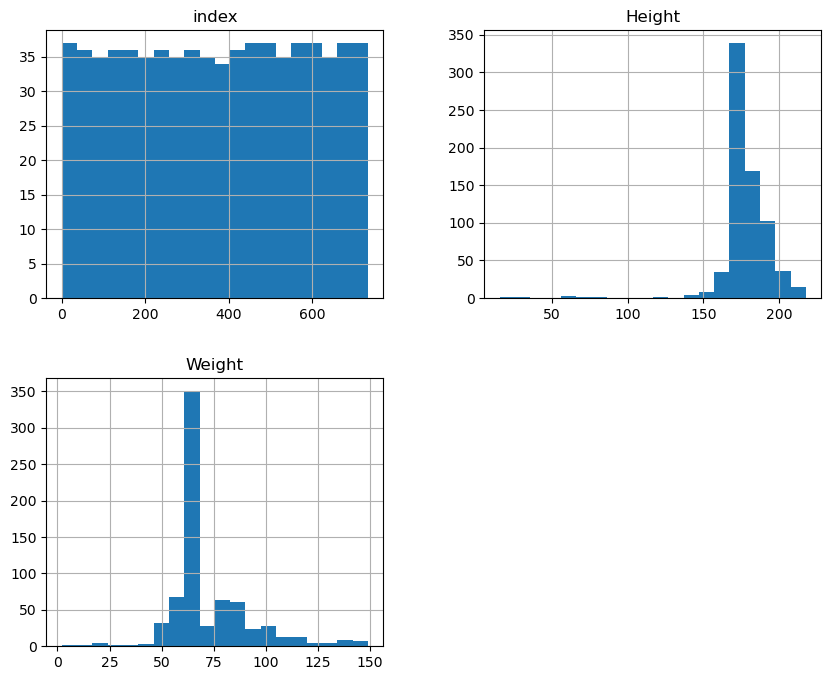

In [827]:
df_heroes.hist(figsize=(10, 8), bins=20);

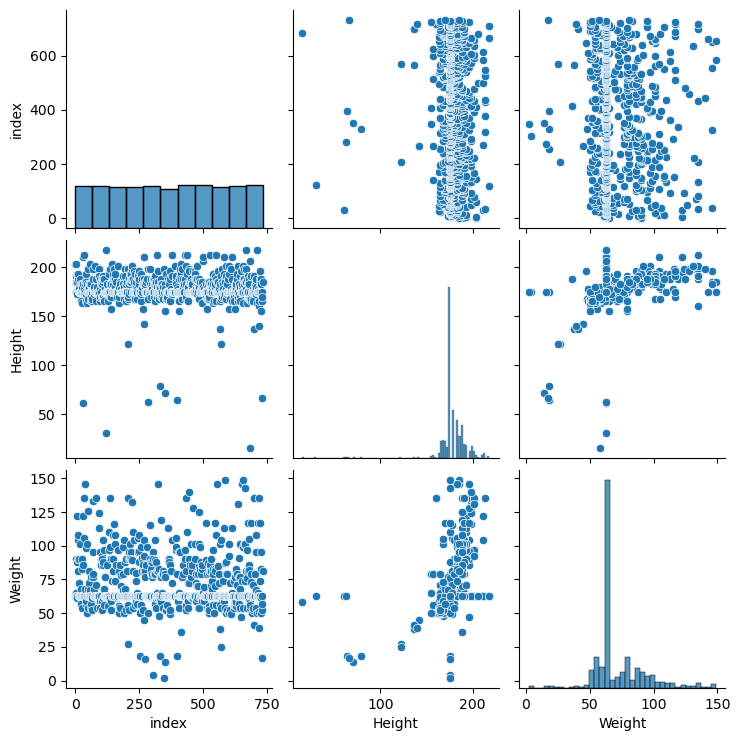

In [829]:
sns.pairplot(df_heroes);

Наблюдается небольшая зависимость между признаком Weight и Height.

In [835]:
df_heroes[['Height', 'Weight']].corr()

,Height,Weight
Height,1.000000,0.425327
Weight,0.425327,1.000000


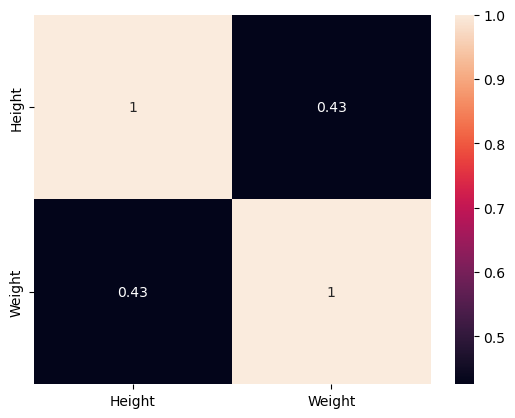

In [837]:
sns.heatmap(df_heroes[['Height', 'Weight']].corr(), annot=True);

### Общиий вывод

1. Был загружен набор данных. Первые наблюдения показали, что в наборе данных есть пропуски и имеются аномальные значения. Статистика показала, что значения во всех признаках находятся не в пределах нормы.
2. Проведена предобработка данных. Обработали пропущенные значения и аномальные значения.
3. Провели разведочный анализ данных. Наблюдается небольшая зависимость между признаком Weight и Height. На рост персонажа влияет вес.